In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
benin_df = pd.read_csv('../data/benin-malanville.csv')
sierra_leone_df = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo_df = pd.read_csv('../data/togo-dapaong_qc.csv')

In [3]:
# Summary statistics
benin_summary = benin_df.describe()
sierra_leone_summary = sierra_leone_df.describe()
togo_summary = togo_df.describe()

# Check for missing values
benin_missing_values = benin_df.isnull().sum()
sierra_leone_missing_values = sierra_leone_df.isnull().sum()
togo_missing_values = togo_df.isnull().sum()

In [38]:
# Define threshold for missing data percentage
threshold = 0.5

# Drop columns with high missing values (> 50%) for each dataframe
benin_df = benin_df.dropna(thresh=len(benin_df) * threshold, axis=1)
sierra_leone_df = sierra_leone_df.dropna(thresh=len(sierra_leone_df) * threshold, axis=1)
togo_df = togo_df.dropna(thresh=len(togo_df) * threshold, axis=1)


# replace missing values with mean
benin_df['GHI'].fillna(benin_df['GHI'].mean(), inplace=True)
sierra_leone_df['GHI'].fillna(sierra_leone_df['GHI'].mean(), inplace=True)
togo_df['GHI'].fillna(togo_df['GHI'].mean(), inplace=True)


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean


# Clean datasets and assign to new variables
benin_df_clean = benin_df.copy()  # Create a copy of the original DataFrame
sierra_leone_df_clean = sierra_leone_df.copy()
togo_df_clean = togo_df.copy()

# Remove outliers in 'GHI' column
benin_df_clean = remove_outliers(benin_df_clean, 'GHI')
sierra_leone_df_clean = remove_outliers(sierra_leone_df_clean, 'GHI')
togo_df_clean = remove_outliers(togo_df_clean, 'GHI')


# Final check for missing values after cleaning
print("Benin Dataset - Missing Values After Cleaning:")
print(benin_df_clean.isnull().sum())

print("\nSierra Leone Dataset - Missing Values After Cleaning:")
print(sierra_leone_df_clean.isnull().sum())

print("\nTogo Dataset - Missing Values After Cleaning:")
print(togo_df_clean.isnull().sum())

Benin Dataset - Missing Values After Cleaning:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

Sierra Leone Dataset - Missing Values After Cleaning:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

Togo Dataset - Missing Values After Cleaning:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH      

In [39]:
# Print the results
print("Benin Summary Statistics:")
print(benin_summary)

print("Sierra Leone Summary Statistics:")
print(sierra_leone_summary)

print("Togo Summary Statistics:")
print(togo_summary)

print("Benin Missing Values:")
print(benin_missing_values)

print("Sierra Leone Missing Values:")
print(sierra_leone_missing_values)

print("Togo Missing Values:")
print(togo_missing_values)

Benin Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%    

In [7]:
# Convert 'Timestamp' column to datetime format
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])
sierra_leone_df['Timestamp'] = pd.to_datetime(sierra_leone_df['Timestamp'])
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])

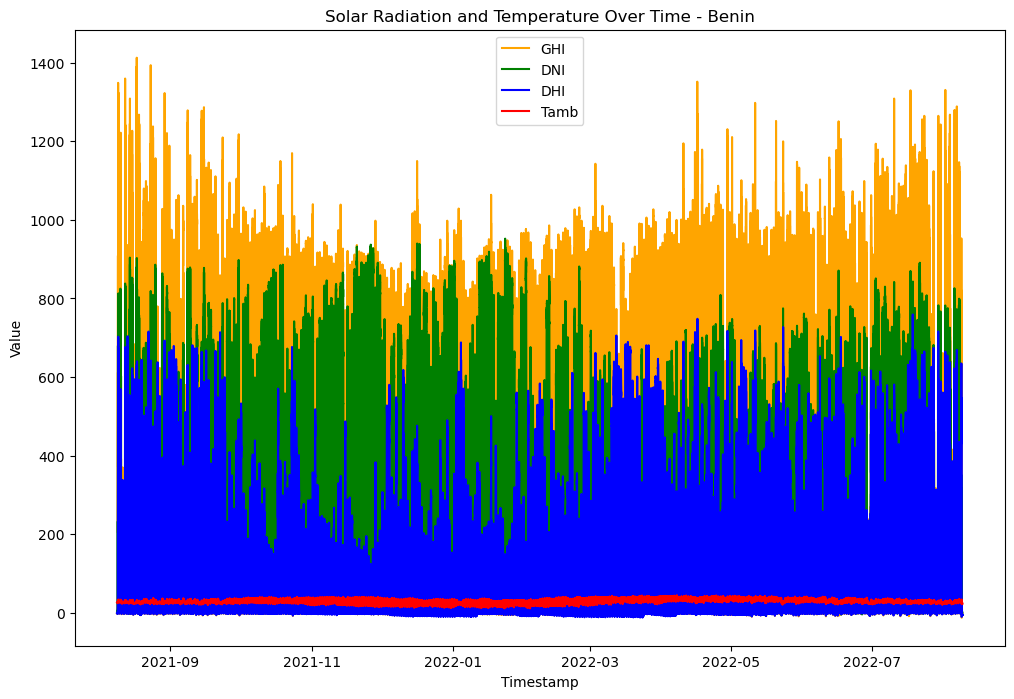

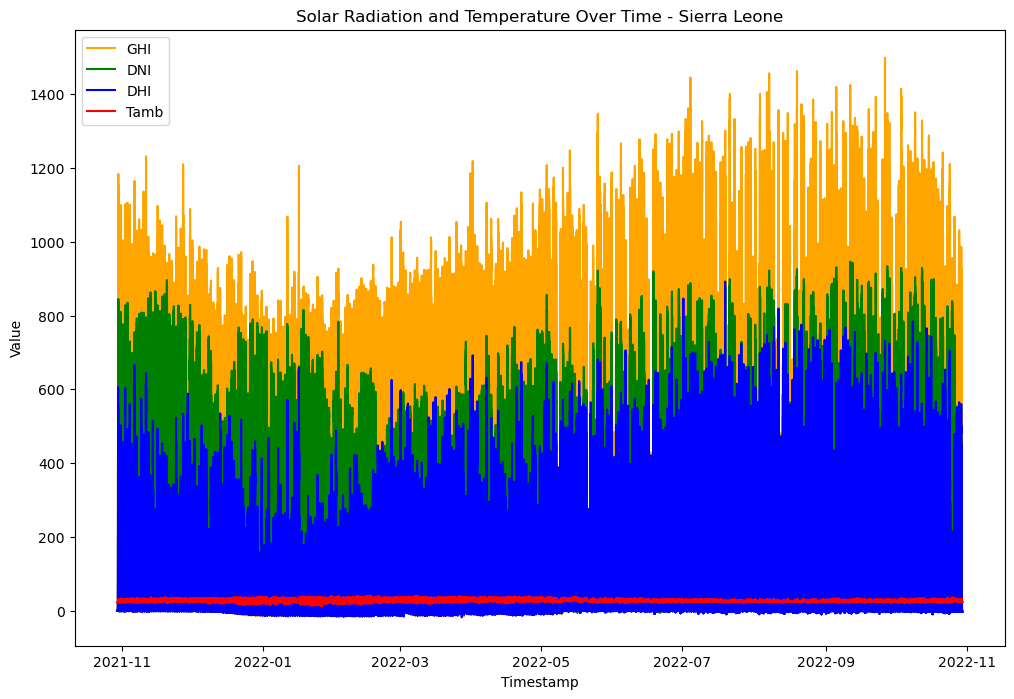

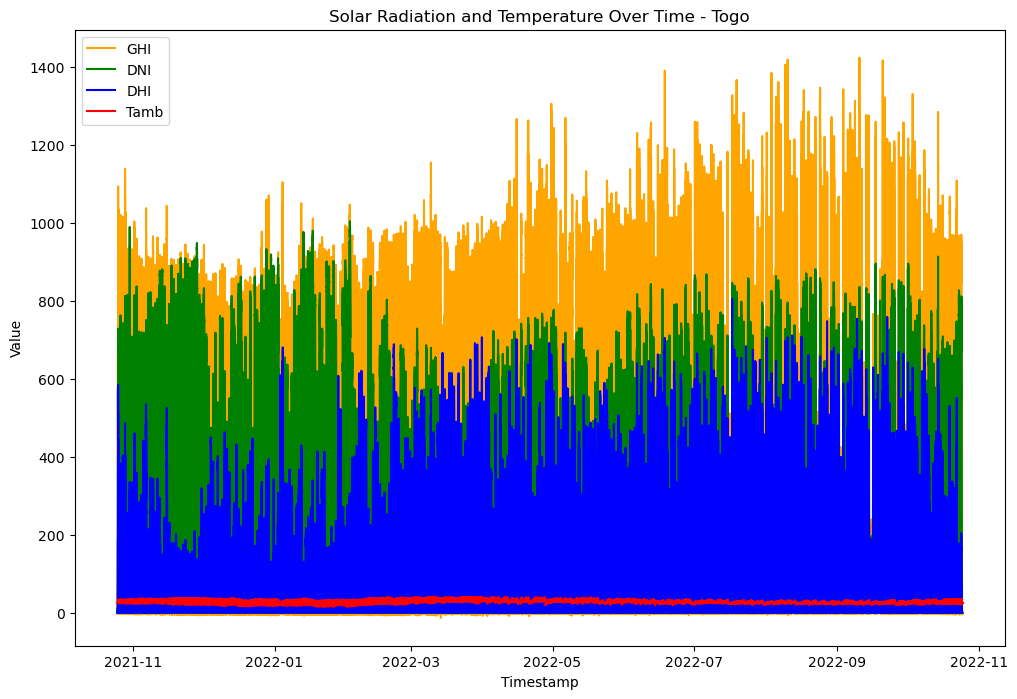

In [8]:
# Plot GHI, DNI, DHI, and Tamb over time for Benin
plt.figure(figsize=(12, 8))
plt.plot(benin_df['Timestamp'], benin_df['GHI'], label='GHI', color='orange')
plt.plot(benin_df['Timestamp'], benin_df['DNI'], label='DNI', color='green')
plt.plot(benin_df['Timestamp'], benin_df['DHI'], label='DHI', color='blue')
plt.plot(benin_df['Timestamp'], benin_df['Tamb'], label='Tamb', color='red')
plt.title('Solar Radiation and Temperature Over Time - Benin')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot GHI, DNI, DHI, and Tamb over time for Sierra Leone
plt.figure(figsize=(12, 8))
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['GHI'], label='GHI', color='orange')
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['DNI'], label='DNI', color='green')
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['DHI'], label='DHI', color='blue')
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['Tamb'], label='Tamb', color='red')
plt.title('Solar Radiation and Temperature Over Time - Sierra Leone')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot GHI, DNI, DHI, and Tamb over time for Togo
plt.figure(figsize=(12, 8))
plt.plot(togo_df['Timestamp'], togo_df['GHI'], label='GHI', color='orange')
plt.plot(togo_df['Timestamp'], togo_df['DNI'], label='DNI', color='green')
plt.plot(togo_df['Timestamp'], togo_df['DHI'], label='DHI', color='blue')
plt.plot(togo_df['Timestamp'], togo_df['Tamb'], label='Tamb', color='red')
plt.title('Solar Radiation and Temperature Over Time - Togo')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()


In [9]:
# Extract relevant columns for correlation analysis
benin_subset = benin_df[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']]
sierra_leone_subset = sierra_leone_df[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']]
togo_subset = togo_df[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']]

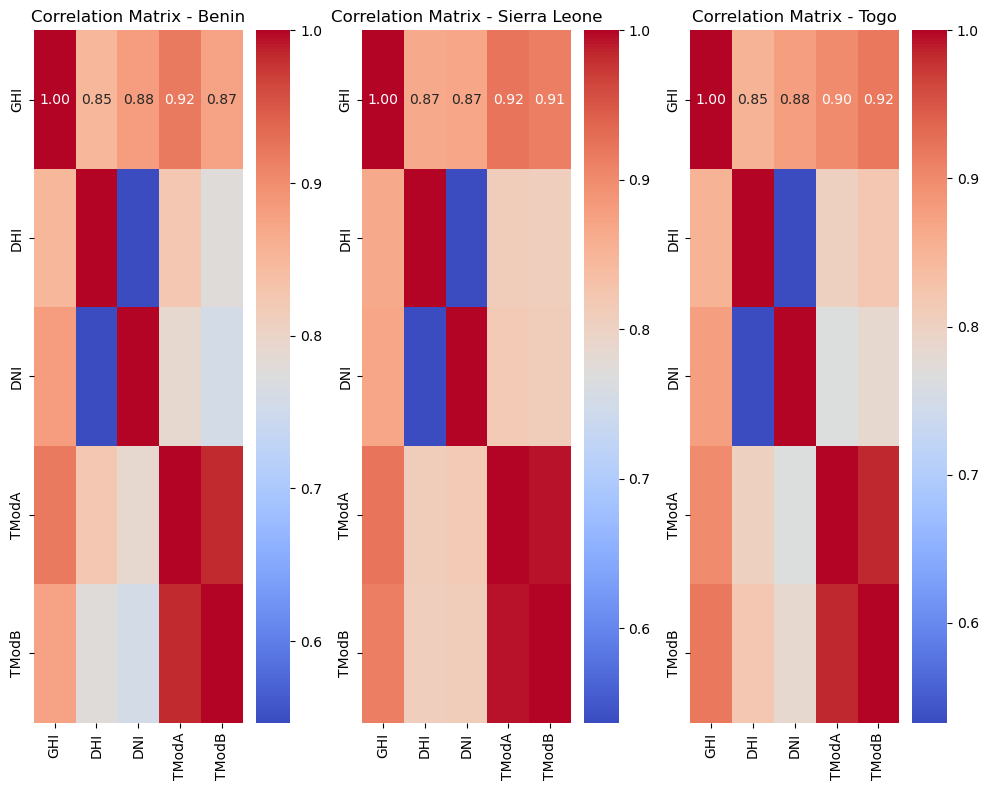

In [10]:
# Calculate correlation matrix
benin_corr = benin_subset.corr()
sierra_leone_corr = sierra_leone_subset.corr()
togo_corr = togo_subset.corr()

# Plot correlation heatmaps
plt.figure(figsize=(10, 8))

# Benin
plt.subplot(1, 3, 1)
sns.heatmap(benin_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Benin')

# Sierra Leone
plt.subplot(1, 3, 2)
sns.heatmap(sierra_leone_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Sierra Leone')

# Togo
plt.subplot(1, 3, 3)
sns.heatmap(togo_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Togo')

plt.tight_layout()
plt.show()

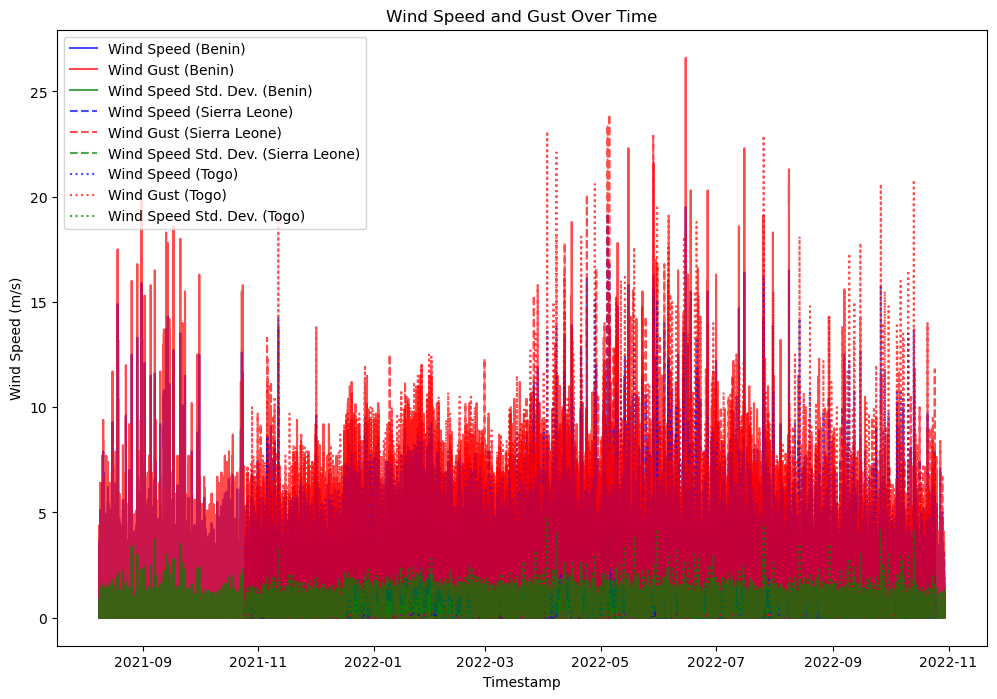

In [16]:
# Plotting wind speed (WS, WSgust, WSstdev) over time for each country
plt.figure(figsize=(12, 8))

# Benin
plt.plot(benin_df['Timestamp'], benin_df['WS'], label='Wind Speed (Benin)', color='blue', alpha=0.7)
plt.plot(benin_df['Timestamp'], benin_df['WSgust'], label='Wind Gust (Benin)', color='red', alpha=0.7)
plt.plot(benin_df['Timestamp'], benin_df['WSstdev'], label='Wind Speed Std. Dev. (Benin)', color='green', alpha=0.7)

# Sierra Leone
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['WS'], label='Wind Speed (Sierra Leone)', linestyle='--', color='blue', alpha=0.7)
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['WSgust'], label='Wind Gust (Sierra Leone)', linestyle='--', color='red', alpha=0.7)
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['WSstdev'], label='Wind Speed Std. Dev. (Sierra Leone)', linestyle='--', color='green', alpha=0.7)

# Togo
plt.plot(togo_df['Timestamp'], togo_df['WS'], label='Wind Speed (Togo)', linestyle=':', color='blue', alpha=0.7)
plt.plot(togo_df['Timestamp'], togo_df['WSgust'], label='Wind Gust (Togo)', linestyle=':', color='red', alpha=0.7)
plt.plot(togo_df['Timestamp'], togo_df['WSstdev'], label='Wind Speed Std. Dev. (Togo)', linestyle=':', color='green', alpha=0.7)

plt.title('Wind Speed and Gust Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

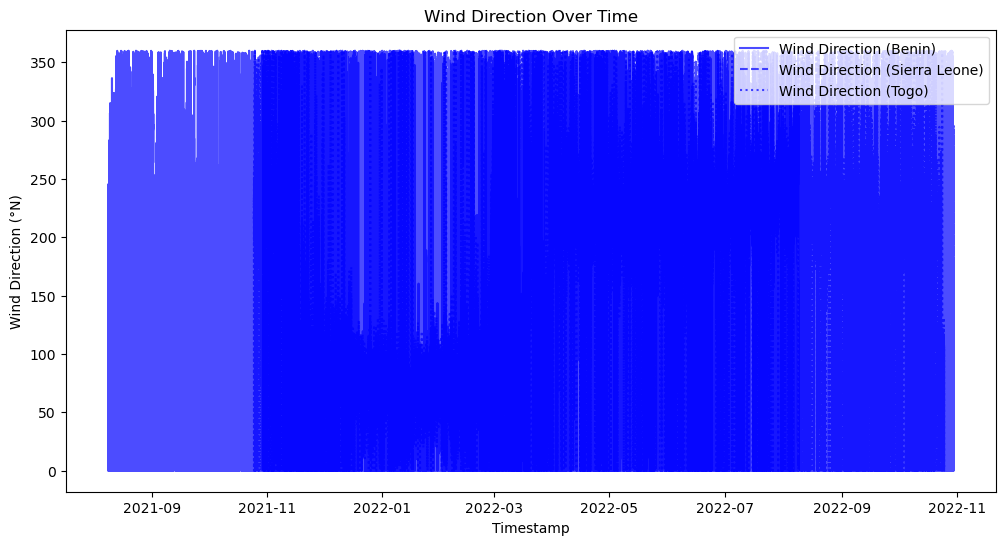

In [15]:
# Plotting wind direction (WD) over time for each country
plt.figure(figsize=(12, 6))

# Benin
plt.plot(benin_df['Timestamp'], benin_df['WD'], label='Wind Direction (Benin)', color='blue', alpha=0.7)

# Sierra Leone
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['WD'], label='Wind Direction (Sierra Leone)', linestyle='--', color='blue', alpha=0.7)

# Togo
plt.plot(togo_df['Timestamp'], togo_df['WD'], label='Wind Direction (Togo)', linestyle=':', color='blue', alpha=0.7)

plt.title('Wind Direction Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Wind Direction (°N)')
plt.legend()
plt.show()


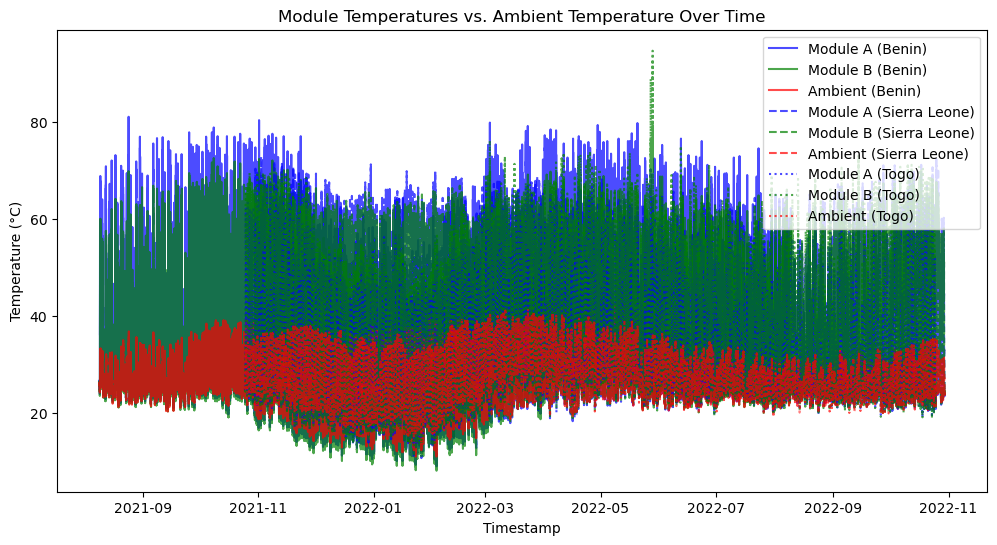

In [17]:
# Plotting module temperatures (TModA, TModB) and ambient temperature (Tamb) over time for each country
plt.figure(figsize=(12, 6))

# Benin
plt.plot(benin_df['Timestamp'], benin_df['TModA'], label='Module A (Benin)', color='blue', alpha=0.7)
plt.plot(benin_df['Timestamp'], benin_df['TModB'], label='Module B (Benin)', color='green', alpha=0.7)
plt.plot(benin_df['Timestamp'], benin_df['Tamb'], label='Ambient (Benin)', color='red', alpha=0.7)

# Sierra Leone
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['TModA'], label='Module A (Sierra Leone)', linestyle='--', color='blue', alpha=0.7)
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['TModB'], label='Module B (Sierra Leone)', linestyle='--', color='green', alpha=0.7)
plt.plot(sierra_leone_df['Timestamp'], sierra_leone_df['Tamb'], label='Ambient (Sierra Leone)', linestyle='--', color='red', alpha=0.7)

# Togo
plt.plot(togo_df['Timestamp'], togo_df['TModA'], label='Module A (Togo)', linestyle=':', color='blue', alpha=0.7)
plt.plot(togo_df['Timestamp'], togo_df['TModB'], label='Module B (Togo)', linestyle=':', color='green', alpha=0.7)
plt.plot(togo_df['Timestamp'], togo_df['Tamb'], label='Ambient (Togo)', linestyle=':', color='red', alpha=0.7)

plt.title('Module Temperatures vs. Ambient Temperature Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


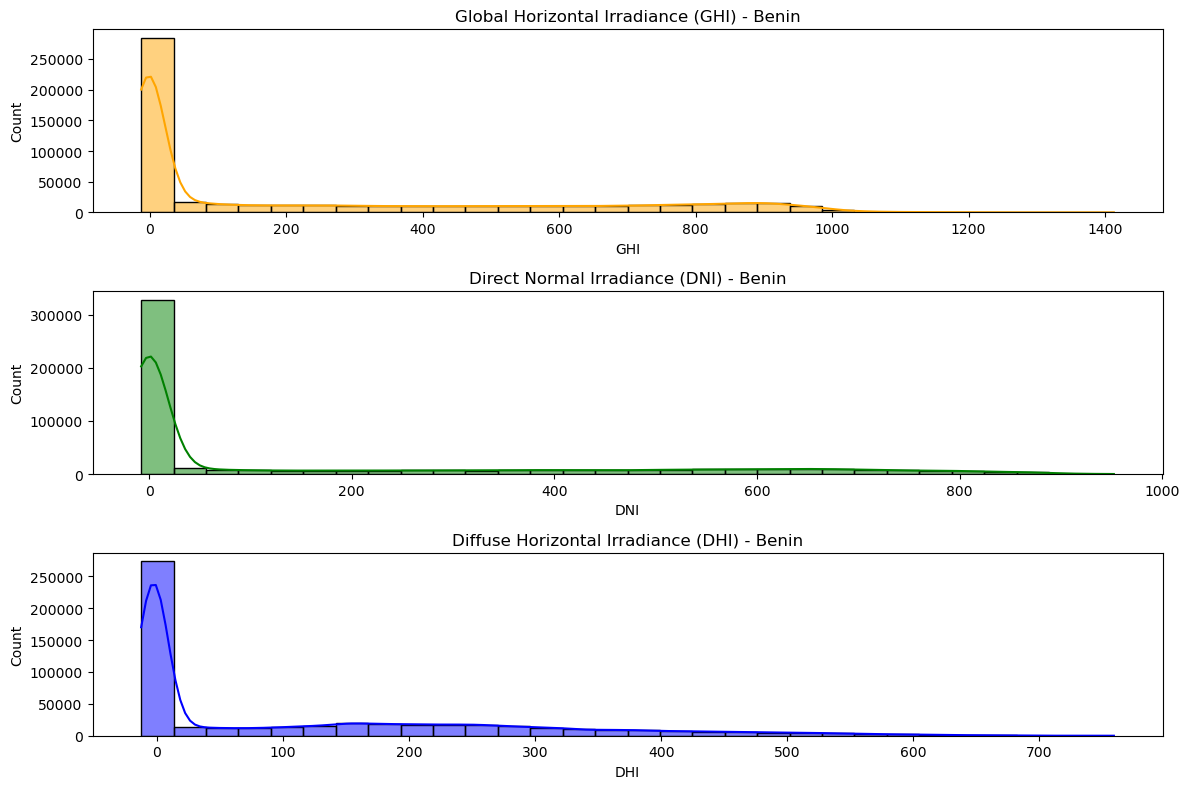

In [18]:
# Create histograms for solar radiation variables (GHI, DNI, DHI)
plt.figure(figsize=(12, 8))

# Benin
plt.subplot(3, 1, 1)
sns.histplot(benin_df['GHI'], bins=30, kde=True, color='orange')
plt.title('Global Horizontal Irradiance (GHI) - Benin')

plt.subplot(3, 1, 2)
sns.histplot(benin_df['DNI'], bins=30, kde=True, color='green')
plt.title('Direct Normal Irradiance (DNI) - Benin')

plt.subplot(3, 1, 3)
sns.histplot(benin_df['DHI'], bins=30, kde=True, color='blue')
plt.title('Diffuse Horizontal Irradiance (DHI) - Benin')

plt.tight_layout()
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


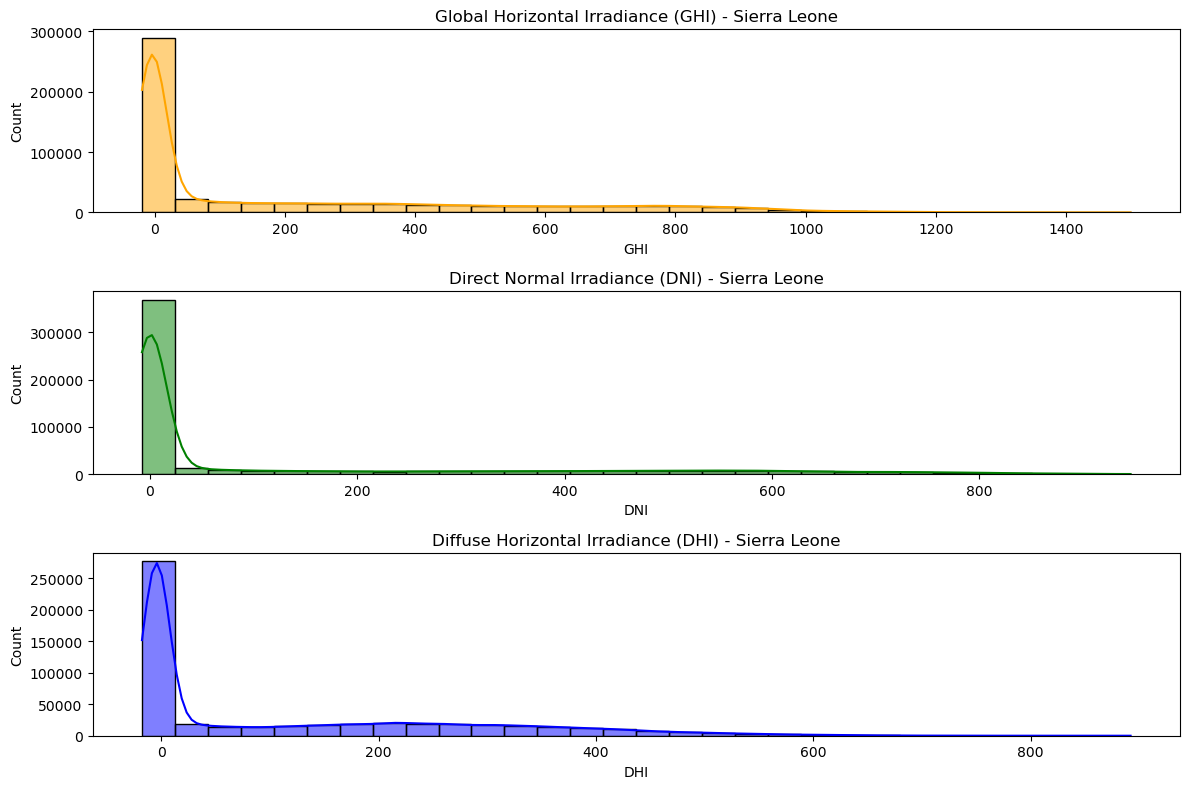

In [19]:
# Create histograms for solar radiation variables (GHI, DNI, DHI)
plt.figure(figsize=(12, 8))

# Sierra Leone
plt.subplot(3, 1, 1)
sns.histplot(sierra_leone_df['GHI'], bins=30, kde=True, color='orange')
plt.title('Global Horizontal Irradiance (GHI) - Sierra Leone')

plt.subplot(3, 1, 2)
sns.histplot(sierra_leone_df['DNI'], bins=30, kde=True, color='green')
plt.title('Direct Normal Irradiance (DNI) - Sierra Leone')

plt.subplot(3, 1, 3)
sns.histplot(sierra_leone_df['DHI'], bins=30, kde=True, color='blue')
plt.title('Diffuse Horizontal Irradiance (DHI) - Sierra Leone')

plt.tight_layout()
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


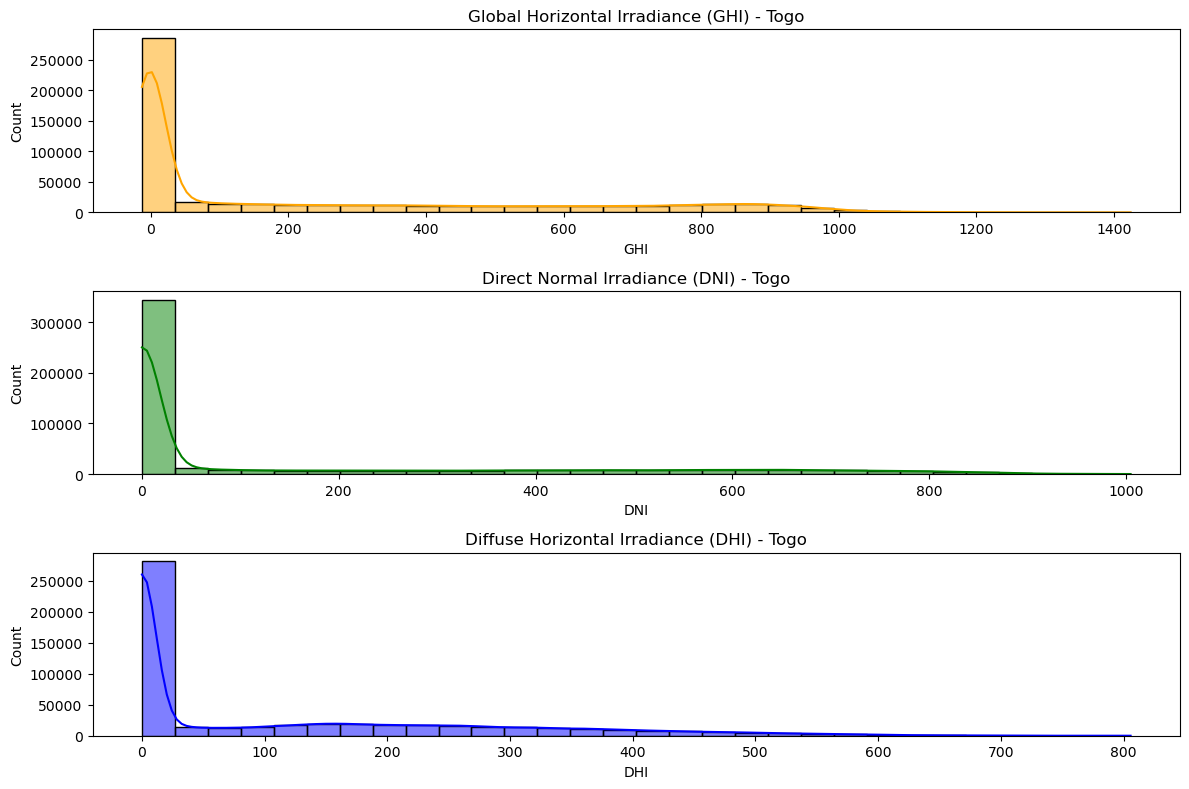

In [21]:
# Create histograms for solar radiation variables (GHI, DNI, DHI)
plt.figure(figsize=(12, 8))

# Togo
plt.subplot(3, 1, 1)
sns.histplot(togo_df['GHI'], bins=30, kde=True, color='orange')
plt.title('Global Horizontal Irradiance (GHI) - Togo')

plt.subplot(3, 1, 2)
sns.histplot(togo_df['DNI'], bins=30, kde=True, color='green')
plt.title('Direct Normal Irradiance (DNI) - Togo')

plt.subplot(3, 1, 3)
sns.histplot(togo_df['DHI'], bins=30, kde=True, color='blue')
plt.title('Diffuse Horizontal Irradiance (DHI) - Togo')

plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


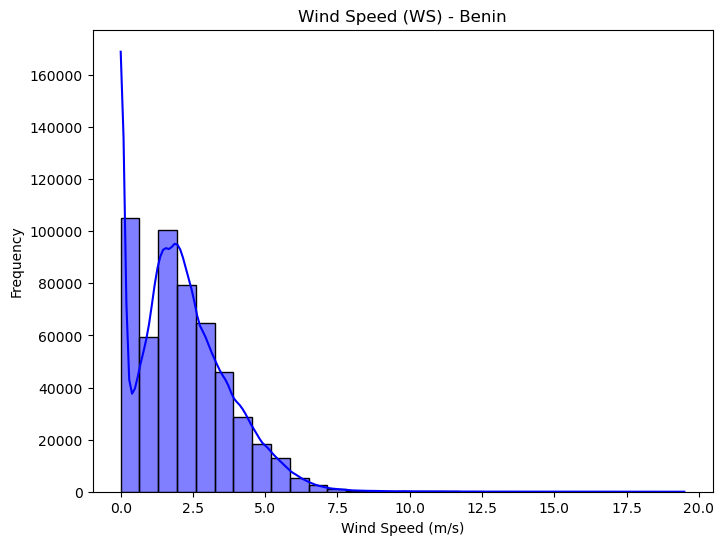

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


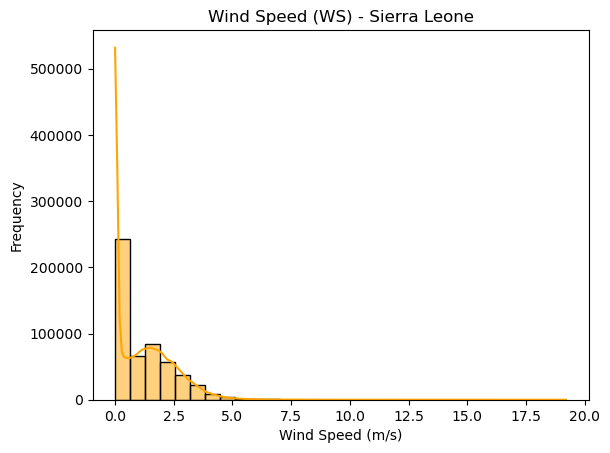

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


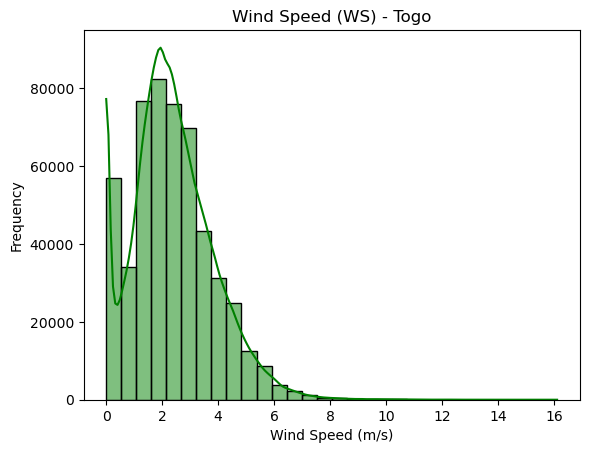

In [27]:
# Create histogram for wind speed (WS)
plt.figure(figsize=(8, 6))

# Benin
sns.histplot(benin_df['WS'], bins=30, kde=True, color='blue')
plt.title('Wind Speed (WS) - Benin')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

# Sierra Leone
sns.histplot(sierra_leone_df['WS'], bins=30, kde=True, color='orange')
plt.title('Wind Speed (WS) - Sierra Leone')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

# Togo
sns.histplot(togo_df['WS'], bins=30, kde=True, color='green')
plt.title('Wind Speed (WS) - Togo')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


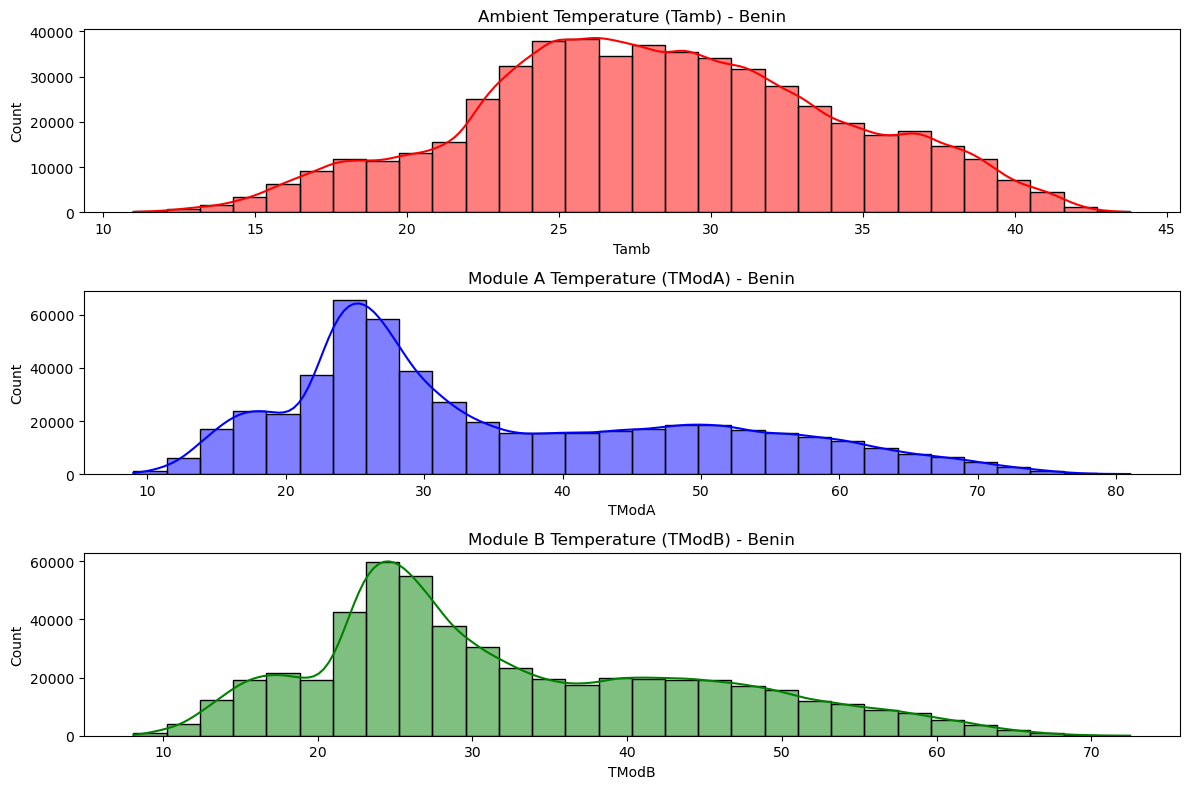

In [24]:
# Create histograms for temperatures (Tamb, TModA, TModB)
plt.figure(figsize=(12, 8))

# Benin
plt.subplot(3, 1, 1)
sns.histplot(benin_df['Tamb'], bins=30, kde=True, color='red')
plt.title('Ambient Temperature (Tamb) - Benin')

plt.subplot(3, 1, 2)
sns.histplot(benin_df['TModA'], bins=30, kde=True, color='blue')
plt.title('Module A Temperature (TModA) - Benin')

plt.subplot(3, 1, 3)
sns.histplot(benin_df['TModB'], bins=30, kde=True, color='green')
plt.title('Module B Temperature (TModB) - Benin')

plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


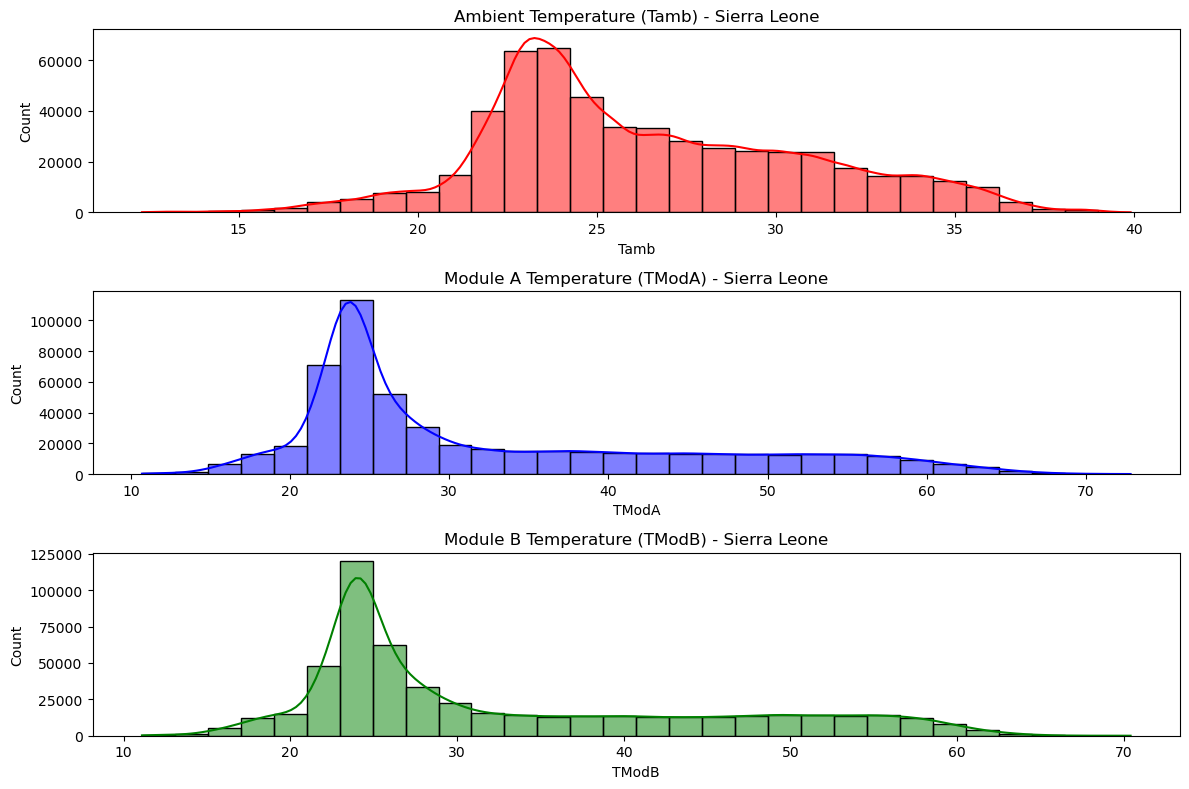

In [26]:
# Create histograms for temperatures (Tamb, TModA, TModB)
plt.figure(figsize=(12, 8))

# Sierra Leone
plt.subplot(3, 1, 1)
sns.histplot(sierra_leone_df['Tamb'], bins=30, kde=True, color='red')
plt.title('Ambient Temperature (Tamb) - Sierra Leone')

plt.subplot(3, 1, 2)
sns.histplot(sierra_leone_df['TModA'], bins=30, kde=True, color='blue')
plt.title('Module A Temperature (TModA) - Sierra Leone')

plt.subplot(3, 1, 3)
sns.histplot(sierra_leone_df['TModB'], bins=30, kde=True, color='green')
plt.title('Module B Temperature (TModB) - Sierra Leone')

plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


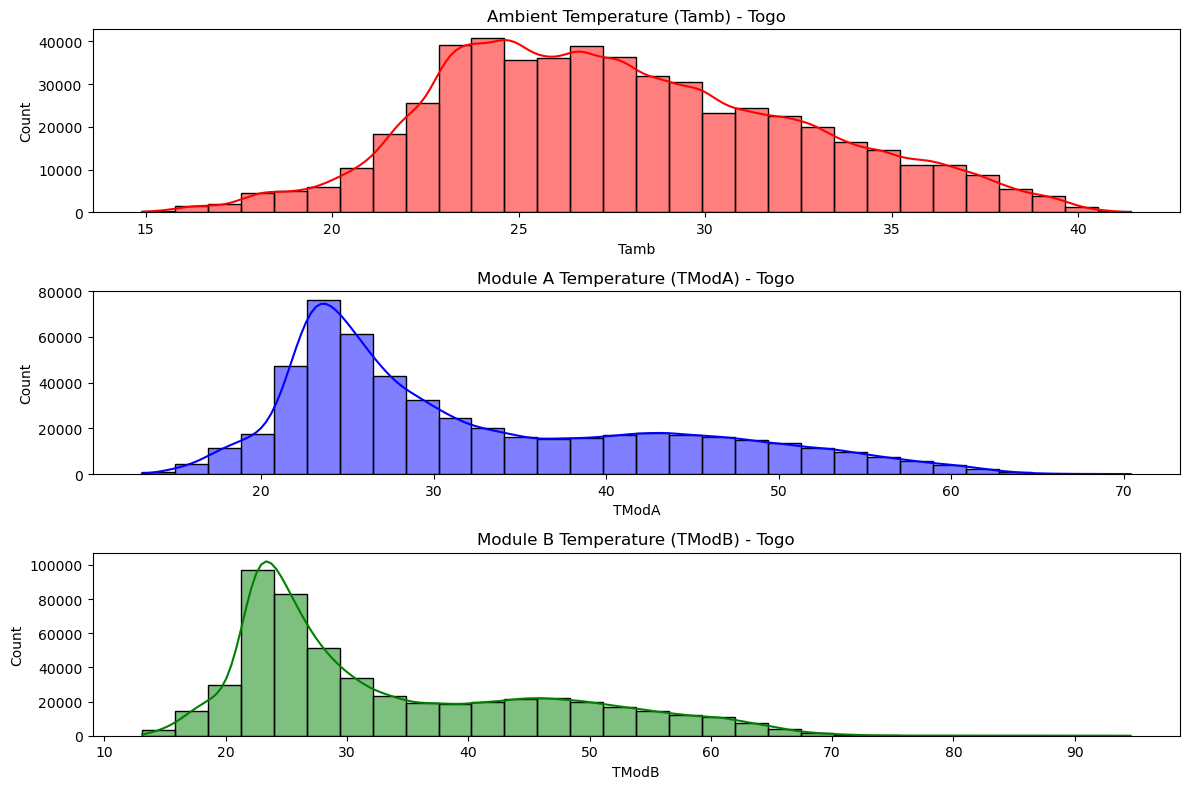

In [28]:
# Create histograms for temperatures (Tamb, TModA, TModB)
plt.figure(figsize=(12, 8))

# Togo
plt.subplot(3, 1, 1)
sns.histplot(togo_df['Tamb'], bins=30, kde=True, color='red')
plt.title('Ambient Temperature (Tamb) - Togo')

plt.subplot(3, 1, 2)
sns.histplot(togo_df['TModA'], bins=30, kde=True, color='blue')
plt.title('Module A Temperature (TModA) - Togo')

plt.subplot(3, 1, 3)
sns.histplot(togo_df['TModB'], bins=30, kde=True, color='green')
plt.title('Module B Temperature (TModB) - Togo')

plt.tight_layout()
plt.show()

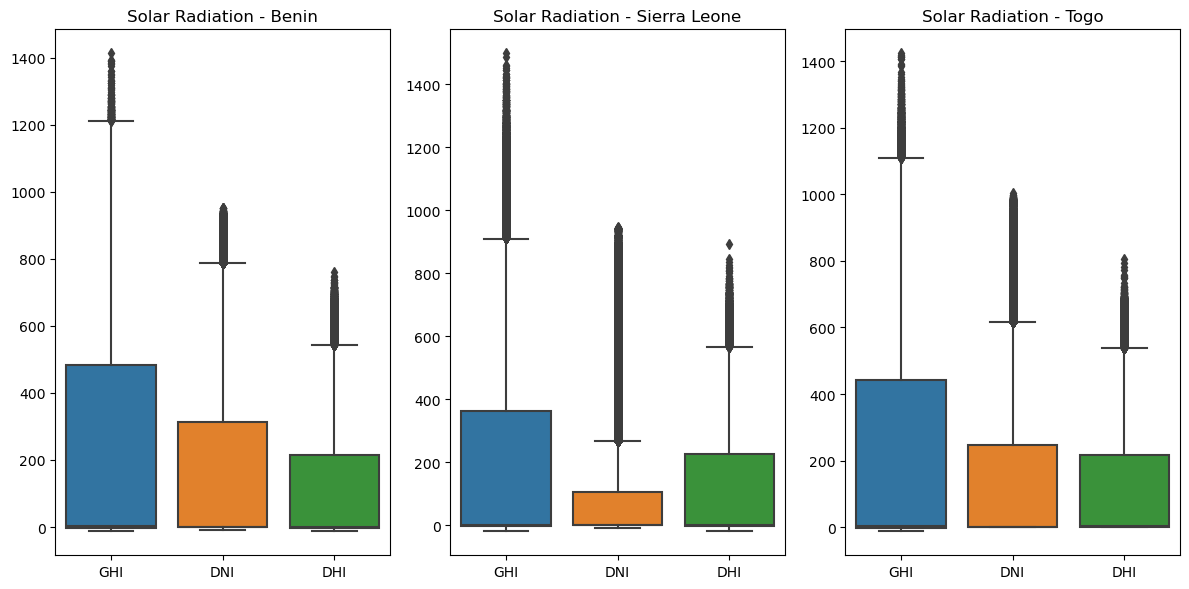

In [29]:
# Create box plots for solar radiation variables (GHI, DNI, DHI)
plt.figure(figsize=(12, 6))

# Solar Radiation Box Plots - Benin
plt.subplot(1, 3, 1)
sns.boxplot(data=benin_df[['GHI', 'DNI', 'DHI']])
plt.title('Solar Radiation - Benin')

# Solar Radiation Box Plots - Sierra Leone
plt.subplot(1, 3, 2)
sns.boxplot(data=sierra_leone_df[['GHI', 'DNI', 'DHI']])
plt.title('Solar Radiation - Sierra Leone')

# Solar Radiation Box Plots - Togo
plt.subplot(1, 3, 3)
sns.boxplot(data=togo_df[['GHI', 'DNI', 'DHI']])
plt.title('Solar Radiation - Togo')

plt.tight_layout()
plt.show()

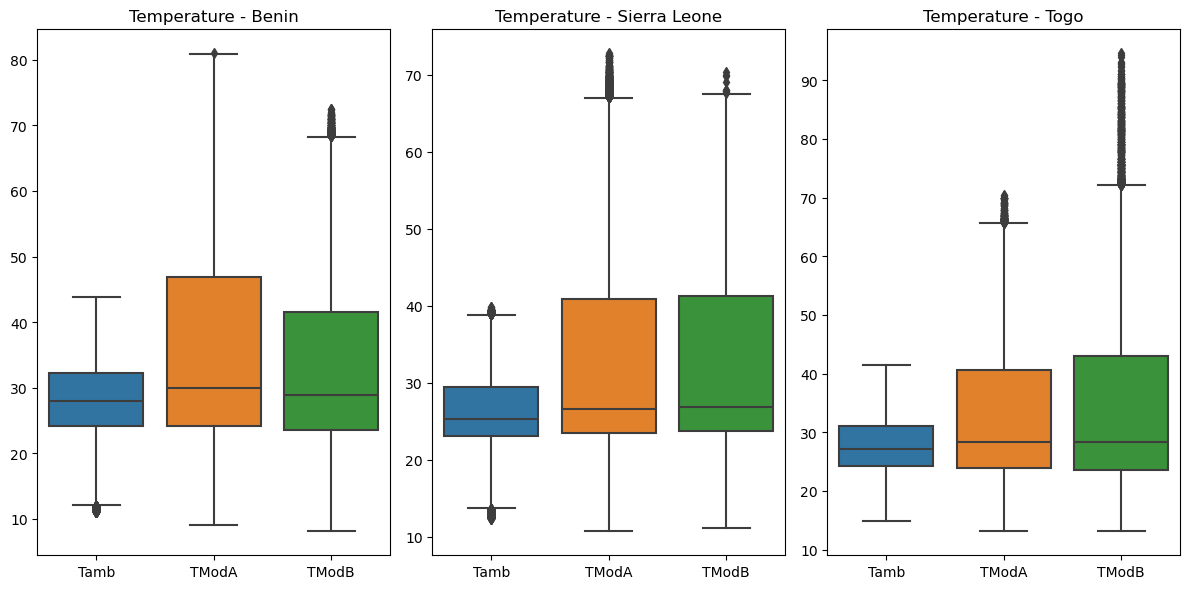

In [30]:
# Create box plots for temperature variables (Tamb, TModA, TModB)
plt.figure(figsize=(12, 6))

# Temperature Box Plots - Benin
plt.subplot(1, 3, 1)
sns.boxplot(data=benin_df[['Tamb', 'TModA', 'TModB']])
plt.title('Temperature - Benin')

# Temperature Box Plots - Sierra Leone
plt.subplot(1, 3, 2)
sns.boxplot(data=sierra_leone_df[['Tamb', 'TModA', 'TModB']])
plt.title('Temperature - Sierra Leone')

# Temperature Box Plots - Togo
plt.subplot(1, 3, 3)
sns.boxplot(data=togo_df[['Tamb', 'TModA', 'TModB']])
plt.title('Temperature - Togo')

plt.tight_layout()
plt.show()

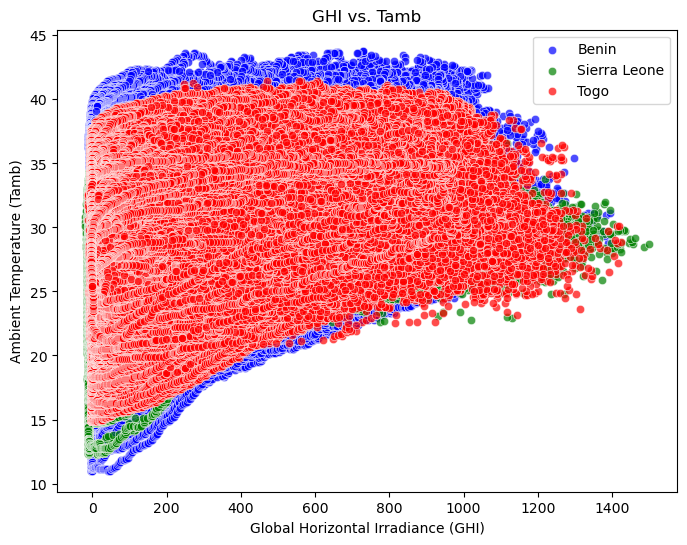

In [31]:
# Scatter plot: GHI vs. Tamb (Global Horizontal Irradiance vs. Ambient Temperature)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GHI', y='Tamb', data=benin_df, label='Benin', color='blue', alpha=0.7)
sns.scatterplot(x='GHI', y='Tamb', data=sierra_leone_df, label='Sierra Leone', color='green', alpha=0.7)
sns.scatterplot(x='GHI', y='Tamb', data=togo_df, label='Togo', color='red', alpha=0.7)
plt.title('GHI vs. Tamb')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.legend()
plt.show()

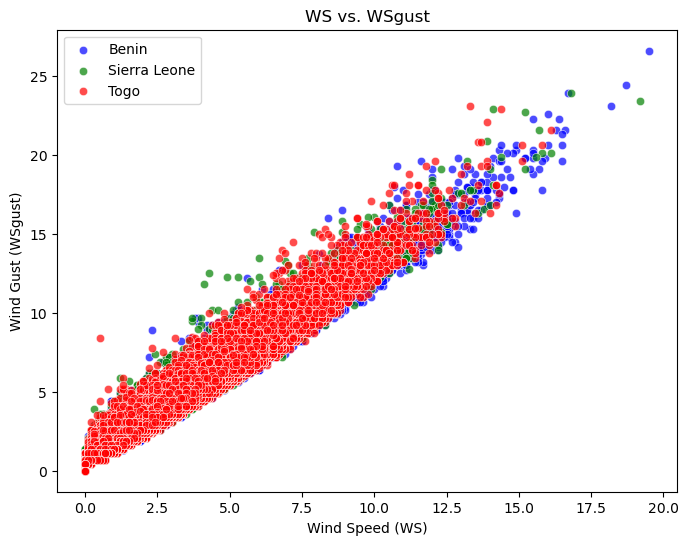

In [32]:
# Scatter plot: WS vs. WSgust (Wind Speed vs. Wind Gust)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WS', y='WSgust', data=benin_df, label='Benin', color='blue', alpha=0.7)
sns.scatterplot(x='WS', y='WSgust', data=sierra_leone_df, label='Sierra Leone', color='green', alpha=0.7)
sns.scatterplot(x='WS', y='WSgust', data=togo_df, label='Togo', color='red', alpha=0.7)
plt.title('WS vs. WSgust')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('Wind Gust (WSgust)')
plt.legend()
plt.show()

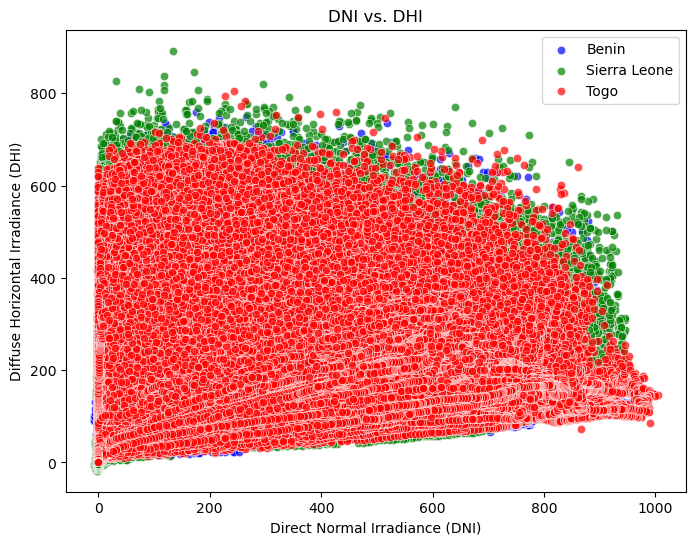

In [33]:
# Scatter plot: DNI vs. DHI (Direct Normal Irradiance vs. Diffuse Horizontal Irradiance)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DNI', y='DHI', data=benin_df, label='Benin', color='blue', alpha=0.7)
sns.scatterplot(x='DNI', y='DHI', data=sierra_leone_df, label='Sierra Leone', color='green', alpha=0.7)
sns.scatterplot(x='DNI', y='DHI', data=togo_df, label='Togo', color='red', alpha=0.7)
plt.title('DNI vs. DHI')
plt.xlabel('Direct Normal Irradiance (DNI)')
plt.ylabel('Diffuse Horizontal Irradiance (DHI)')
plt.legend()
plt.show()